In [1]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Ciclos de siembra y cosecha en Argentina para los cultivos de soja, maíz, trigo, girasol y sorgo

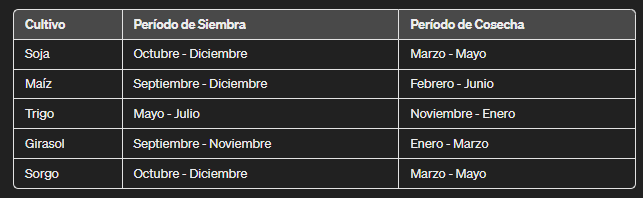

In [4]:
def determinar_campana(cultivo, mes_forward, año_forward):
    # Diccionario con el primer mes de cosecha de cada cultivo
    inicio_cosecha = {
        'Soja': 3,  # Marzo
        'Maíz': 2,  # Febrero
        'Trigo': 11, # Noviembre
        'Girasol': 1,  # Enero
        'Sorgo': 3   # Marzo
    }

    # Diccionario con el último mes de cosecha para cultivos que cruzan el año
    fin_cosecha = {
        'Trigo': 1,  # Enero del año siguiente
    }
    
    # Diccionario para convertir número de mes a su abreviatura
    meses = {
        1: 'ENE', 2: 'FEB', 3: 'MAR', 4: 'ABR',
        5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AGO',
        9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DIC'
    }
    
    mes_inicio_cosecha = inicio_cosecha.get(cultivo)
    mes_fin_cosecha = fin_cosecha.get(cultivo, mes_inicio_cosecha)
    
    # Determinar la campaña basado en el mes del forward
    if cultivo == 'Trigo':
        if mes_forward >= mes_inicio_cosecha or mes_forward <= 1:  # Noviembre, Diciembre, Enero
            if mes_forward == 1:  # Enero
                año_campana = año_forward - 1  # Enero pertenece a la campaña del año anterior
            else:
                año_campana = año_forward  # Noviembre y Diciembre pertenecen a la campaña del año de siembra
        else:
            año_campana = año_forward - 1  # Meses antes de noviembre pertenecen a la campaña anterior
    else:
        if mes_forward < mes_inicio_cosecha:
            año_campana = año_forward - 2  # El forward pertenece a la campaña que terminó en el año anterior
        else:
            año_campana = año_forward - 1  # El forward pertenece a la cosecha actual que comenzó con la siembra del año anterior

    return f"Para un negocio de {cultivo} Forward {meses[mes_forward]}-{str(año_forward)[2:]} la campaña es {año_campana}-{año_campana + 1}"


In [5]:
# Validaciones

In [7]:
# Diccionario para convertir número de mes a su abreviatura
meses = {
    1: 'ENE', 2: 'FEB', 3: 'MAR', 4: 'ABR',
    5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AGO',
    9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DIC'
}

In [10]:
# Pruebas para SOJA
test_months = [1, 2, 3, 4]
test_results = {'Soja ' + 'Fw ' + meses[month] + '-25': determinar_campana('Soja', month, 2025) for month in test_months}
test_results

{'Soja Fw ENE-25': 'Para un negocio de Soja Forward ENE-25 la campaña es 2023-2024',
 'Soja Fw FEB-25': 'Para un negocio de Soja Forward FEB-25 la campaña es 2023-2024',
 'Soja Fw MAR-25': 'Para un negocio de Soja Forward MAR-25 la campaña es 2024-2025',
 'Soja Fw ABR-25': 'Para un negocio de Soja Forward ABR-25 la campaña es 2024-2025'}

In [16]:
# Pruebas para MAÍZ
test_months = [11, 12]
test_results = {'Maíz ' + 'Fw ' + meses[month] + '-24': determinar_campana('Maíz', month, 2024) for month in test_months}
test_results

{'Maíz Fw NOV-24': 'Para un negocio de Maíz Forward NOV-24 la campaña es 2023-2024',
 'Maíz Fw DIC-24': 'Para un negocio de Maíz Forward DIC-24 la campaña es 2023-2024'}

In [17]:
# Pruebas para MAÍZ
test_months = [1, 2, 3]
test_results = {'Maíz ' + 'Fw ' + meses[month] + '-25': determinar_campana('Maíz', month, 2025) for month in test_months}
test_results

{'Maíz Fw ENE-25': 'Para un negocio de Maíz Forward ENE-25 la campaña es 2023-2024',
 'Maíz Fw FEB-25': 'Para un negocio de Maíz Forward FEB-25 la campaña es 2024-2025',
 'Maíz Fw MAR-25': 'Para un negocio de Maíz Forward MAR-25 la campaña es 2024-2025'}

In [ ]:
# Pruebas para TRIGO
test_months = [9, 10, 11, 12]
test_results = {'Trigo ' + 'Fw ' + meses[month] + '-24': determinar_campana('Trigo', month, 2024) for month in test_months}
test_results

{'Trigo Fw SEP-24': 'Para un negocio de Trigo Forward SEP-24 la campaña es 2023-2024',
 'Trigo Fw OCT-24': 'Para un negocio de Trigo Forward OCT-24 la campaña es 2023-2024',
 'Trigo Fw NOV-24': 'Para un negocio de Trigo Forward NOV-24 la campaña es 2024-2025',
 'Trigo Fw DIC-24': 'Para un negocio de Trigo Forward DIC-24 la campaña es 2024-2025'}

In [ ]:
# Pruebas para TRIGO
test_months = [1, 2, 10, 11, 12]
test_results = {'Trigo ' + 'Fw ' + meses[month] + '-25': determinar_campana('Trigo', month, 2025) for month in test_months}
test_results

{'Trigo Fw ENE-25': 'Para un negocio de Trigo Forward ENE-25 la campaña es 2024-2025',
 'Trigo Fw FEB-25': 'Para un negocio de Trigo Forward FEB-25 la campaña es 2024-2025',
 'Trigo Fw OCT-25': 'Para un negocio de Trigo Forward OCT-25 la campaña es 2024-2025',
 'Trigo Fw NOV-25': 'Para un negocio de Trigo Forward NOV-25 la campaña es 2025-2026',
 'Trigo Fw DIC-25': 'Para un negocio de Trigo Forward DIC-25 la campaña es 2025-2026'}

In [13]:
# Pruebas para GIRASOL 2024
test_months = [11, 12] 
test_results = {'Girasol ' + 'Fw ' + meses[month] + '-25': determinar_campana('Girasol', month, 2024) for month in test_months}
test_results

{'Girasol Fw NOV-25': 'Para un negocio de Girasol Forward NOV-24 la campaña es 2023-2024',
 'Girasol Fw DIC-25': 'Para un negocio de Girasol Forward DIC-24 la campaña es 2023-2024'}

In [14]:
# Pruebas para GIRASOL 2025
test_months = [1, 2, 3] 
test_results = {'Girasol ' + 'Fw ' + meses[month] + '-25': determinar_campana('Girasol', month, 2025) for month in test_months}
test_results

{'Girasol Fw ENE-25': 'Para un negocio de Girasol Forward ENE-25 la campaña es 2024-2025',
 'Girasol Fw FEB-25': 'Para un negocio de Girasol Forward FEB-25 la campaña es 2024-2025',
 'Girasol Fw MAR-25': 'Para un negocio de Girasol Forward MAR-25 la campaña es 2024-2025'}

In [15]:
# Pruebas para SORGO
test_months = [1, 2, 3, 4]  # Enero, Febrero, Marzo, Abril
test_results = {'Sorgo ' + 'Fw ' + meses[month] + '-25': determinar_campana('Sorgo', month, 2025) for month in test_months}
test_results

{'Sorgo Fw ENE-25': 'Para un negocio de Sorgo Forward ENE-25 la campaña es 2023-2024',
 'Sorgo Fw FEB-25': 'Para un negocio de Sorgo Forward FEB-25 la campaña es 2023-2024',
 'Sorgo Fw MAR-25': 'Para un negocio de Sorgo Forward MAR-25 la campaña es 2024-2025',
 'Sorgo Fw ABR-25': 'Para un negocio de Sorgo Forward ABR-25 la campaña es 2024-2025'}